In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

from scipy import stats

singapore coords - 1.36 103.98 16

In [5]:
latitude = 1.36
longitude = 103.98
height = 16

In [6]:
km_array = np.arange(0,30000,1000)
for file in os.listdir('48698 2019'):
    day = pd.read_excel(f'48698 2019/{file}', index_col = 'Unnamed: 0')
    day["TEMP_K"] = day['TEMP'] + 273.15
    day["PRES_PA"] = day['PRES'] * 100
    first_pack = pd.DataFrame(None)
    first_pack['km_array'] = km_array
    for col in ['PRES_PA', 'TEMP_K']:
        first_pack[f'interp_' + col] = np.round(np.interp(km_array, day['HGHT'], day[col]),2)
    first_pack.to_excel(f"first_pack/first_{file[6:16]}.xlsx")
    
    second_pack = pd.DataFrame(None)
    second_pack['km_array'] = km_array
    for col in ['DRCT','SKNT']:
        second_pack[f'interp_' + col] = np.round(np.interp(km_array, day['HGHT'], day[col]),2)
    second_pack.to_excel(f"second_pack/first_{file[6:16]}.xlsx")

In [8]:
from nrlmsise00 import msise_model
import datetime

In [10]:
jan_sun_data = pd.read_csv('C:\\Users\\lazuli\\2 master\\cringe_modeling\\nrlmsise_data\\jan.csv')
apr_sun_data = pd.read_csv('C:\\Users\\lazuli\\2 master\\cringe_modeling\\nrlmsise_data\\apr.csv')
jul_sun_data = pd.read_csv('C:\\Users\\lazuli\\2 master\\cringe_modeling\\nrlmsise_data\\jul.csv')
oct_sun_data = pd.read_csv('C:\\Users\\lazuli\\2 master\\cringe_modeling\\nrlmsise_data\\oct.csv')
jan_sun_data.shape
# (time, alt, lat, lon, f107a, f107, ap, lst=None, ap_a=None, flags=None, method='gtd7'

(31, 3)

In [11]:
def nrlmsise(dataframe_of_params):
    density_list = []
    temperatures_list = []
    for i in range(jan_sun_data.shape[0]):
        results = msise_model(datetime.datetime(2019,1,i+1,0,0,0,0), 0,latitude,longitude,
                    dataframe_of_params.f10_7a[i], dataframe_of_params.f10_7[i],dataframe_of_params.ap[i])
        density_list.append(np.array(results[0]))
        temperatures_list.append(np.array(results[1]))
    dataframe_of_params['He density'] = np.array(density_list).T[0]
    dataframe_of_params['O  density'] = np.array(density_list).T[1]
    dataframe_of_params['N2 density'] = np.array(density_list).T[2]
    dataframe_of_params['O2 density'] = np.array(density_list).T[3]
    dataframe_of_params['AR density'] = np.array(density_list).T[4]
    dataframe_of_params['total mass density'] = np.array(density_list).T[5]
    dataframe_of_params['H  density'] = np.array(density_list).T[6]
    dataframe_of_params['N  density'] = np.array(density_list).T[7]
    dataframe_of_params['Anomalous oxygen number density'] = np.array(density_list).T[8]
    dataframe_of_params['Exospheric temperature'] = np.array(temperatures_list).T[0]
    dataframe_of_params['Temperature at alt '] = np.array(temperatures_list).T[1]
    return dataframe_of_params

In [12]:
def nrlmsise_1(dataframe_of_params):

    temp_temporary = []
    for i in range(jan_sun_data.shape[0]):
        for alt in range(31):
            results = msise_model(datetime.datetime(2019,1,i+1,0,0,0,0), alt, latitude, longitude,
                        dataframe_of_params.f10_7a[i], dataframe_of_params.f10_7[i],dataframe_of_params.ap[i])
            temp_temporary.append((alt, results[1][1]))
    return temp_temporary

In [28]:
jan_sun_data

,f10_7,f10_7a,ap,He density,O density,N2 density,O2 density,AR density,total mass density,H density,N density,Anomalous oxygen number density,Exospheric temperature,Temperature at alt
0,67.0,68.4,4.9,1.254340e+14,0.0,1.869159e+19,5.014392e+18,2.235794e+17,0.001150,0.0,0.0,0.0,1027.318465,302.078041
1,69.5,68.4,0.5,1.255458e+14,0.0,1.870825e+19,5.018861e+18,2.237787e+17,0.001151,0.0,0.0,0.0,1027.318465,302.084650
2,72.7,68.4,1.3,1.256113e+14,0.0,1.871800e+19,5.021478e+18,2.238954e+17,0.001152,0.0,0.0,0.0,1027.318465,302.091052
3,70.2,68.4,8.6,1.255179e+14,0.0,1.870409e+19,5.017746e+18,2.237289e+17,0.001151,0.0,0.0,0.0,1027.318465,302.097247
4,69.1,68.4,16.3,1.254696e+14,0.0,1.869690e+19,5.015817e+18,2.236429e+17,0.001150,0.0,0.0,0.0,1027.318465,302.103232
5,68.8,68.4,9.3,1.255375e+14,0.0,1.870701e+19,5.018531e+18,2.237640e+17,0.001151,0.0,0.0,0.0,1027.318465,302.109007
6,69.6,68.4,5.6,1.256098e+14,0.0,1.871778e+19,5.021419e+18,2.238927e+17,0.001152,0.0,0.0,0.0,1027.318465,302.114570
7,69.1,68.4,5.5,1.256294e+14,0.0,1.872070e+19,5.022201e+18,2.239276e+17,0.001152,0.0,0.0,0.0,1027.318465,302.119920
8,69.0,68.4,3.9,1.256720e+14,0.0,1.872705e+19,5.023905e+18,2.240036e+17,0.001152,0.0,0.0,0.0,1027.318465,302.125055
9,69.2,68.5,3.1,1.257113e+14,0.0,1.873291e+19,5.025479e+18,2.240737e+17,0.001153,0.0,0.0,0.0,1027.318465,302.129975


In [13]:
pd.DataFrame(nrlmsise_1(jan_sun_data), columns = ['altitude', 'temp_model']).groupby(by = 'altitude').mean()['temp_model']

altitude
0     302.145756
1     295.112253
2     289.446820
3     284.574972
4     280.006414
5     275.313317
6     270.124670
7     264.131711
8     257.099938
9     248.882850
10    239.432334
11    229.036833
12    218.843674
13    209.863803
14    202.795117
15    198.169387
16    196.265430
17    196.533233
18    198.336387
19    201.089391
20    204.180136
21    207.057337
22    209.637679
23    211.968812
24    214.106214
25    216.112128
26    218.054713
27    220.007556
28    222.049605
29    224.265652
30    226.747461
Name: temp_model, dtype: float64

In [14]:
jan_model_data = nrlmsise(jan_sun_data)
apr_model_data = nrlmsise(apr_sun_data)
jul_model_data = nrlmsise(jul_sun_data)
oct_model_data = nrlmsise(oct_sun_data)

In [15]:
jan_model_data

,f10_7,f10_7a,ap,He density,O density,N2 density,O2 density,AR density,total mass density,H density,N density,Anomalous oxygen number density,Exospheric temperature,Temperature at alt
0,67.0,68.4,4.9,1.254340e+14,0.0,1.869159e+19,5.014392e+18,2.235794e+17,0.001150,0.0,0.0,0.0,1027.318465,302.078041
1,69.5,68.4,0.5,1.255458e+14,0.0,1.870825e+19,5.018861e+18,2.237787e+17,0.001151,0.0,0.0,0.0,1027.318465,302.084650
2,72.7,68.4,1.3,1.256113e+14,0.0,1.871800e+19,5.021478e+18,2.238954e+17,0.001152,0.0,0.0,0.0,1027.318465,302.091052
3,70.2,68.4,8.6,1.255179e+14,0.0,1.870409e+19,5.017746e+18,2.237289e+17,0.001151,0.0,0.0,0.0,1027.318465,302.097247
4,69.1,68.4,16.3,1.254696e+14,0.0,1.869690e+19,5.015817e+18,2.236429e+17,0.001150,0.0,0.0,0.0,1027.318465,302.103232
5,68.8,68.4,9.3,1.255375e+14,0.0,1.870701e+19,5.018531e+18,2.237640e+17,0.001151,0.0,0.0,0.0,1027.318465,302.109007
6,69.6,68.4,5.6,1.256098e+14,0.0,1.871778e+19,5.021419e+18,2.238927e+17,0.001152,0.0,0.0,0.0,1027.318465,302.114570
7,69.1,68.4,5.5,1.256294e+14,0.0,1.872070e+19,5.022201e+18,2.239276e+17,0.001152,0.0,0.0,0.0,1027.318465,302.119920
8,69.0,68.4,3.9,1.256720e+14,0.0,1.872705e+19,5.023905e+18,2.240036e+17,0.001152,0.0,0.0,0.0,1027.318465,302.125055
9,69.2,68.5,3.1,1.257113e+14,0.0,1.873291e+19,5.025479e+18,2.240737e+17,0.001153,0.0,0.0,0.0,1027.318465,302.129975


In [16]:
apr_model_data

,f10_7,f10_7a,ap,He density,O density,N2 density,O2 density,AR density,total mass density,H density,N density,Anomalous oxygen number density,Exospheric temperature,Temperature at alt
0,69.4,72.0,6.4,1.254056e+14,0.0,1.868736e+19,5.013257e+18,2.235288e+17,0.001150,0.0,0.0,0.0,1027.318465,302.078041
1,69.2,72.1,6.1,1.254241e+14,0.0,1.869011e+19,5.013996e+18,2.235618e+17,0.001150,0.0,0.0,0.0,1027.318465,302.084650
2,70.8,72.1,9.9,1.254391e+14,0.0,1.869235e+19,5.014596e+18,2.235885e+17,0.001150,0.0,0.0,0.0,1027.318465,302.091052
3,70.6,72.2,9.9,1.254570e+14,0.0,1.869501e+19,5.015311e+18,2.236204e+17,0.001150,0.0,0.0,0.0,1027.318465,302.097247
4,70.3,72.2,12.0,1.254600e+14,0.0,1.869546e+19,5.015432e+18,2.236258e+17,0.001150,0.0,0.0,0.0,1027.318465,302.103232
5,71.8,72.2,6.8,1.255522e+14,0.0,1.870920e+19,5.019116e+18,2.237900e+17,0.001151,0.0,0.0,0.0,1027.318465,302.109007
6,73.7,72.2,4.4,1.256335e+14,0.0,1.872131e+19,5.022367e+18,2.239350e+17,0.001152,0.0,0.0,0.0,1027.318465,302.114570
7,76.6,72.2,11.4,1.256463e+14,0.0,1.872322e+19,5.022879e+18,2.239578e+17,0.001152,0.0,0.0,0.0,1027.318465,302.119920
8,78.8,72.2,8.8,1.257314e+14,0.0,1.873590e+19,5.026281e+18,2.241095e+17,0.001153,0.0,0.0,0.0,1027.318465,302.125055
9,79.3,72.2,13.8,1.257310e+14,0.0,1.873585e+19,5.026266e+18,2.241088e+17,0.001153,0.0,0.0,0.0,1027.318465,302.129975


In [17]:
jul_model_data

,f10_7,f10_7a,ap,He density,O density,N2 density,O2 density,AR density,total mass density,H density,N density,Anomalous oxygen number density,Exospheric temperature,Temperature at alt
0,69.7,69.7,7.6,1.254340e+14,0.0,1.869159e+19,5.014392e+18,2.235794e+17,0.001150,0.0,0.0,0.0,1027.318465,302.078041
1,70.5,69.7,4.5,1.254975e+14,0.0,1.870105e+19,5.016931e+18,2.236926e+17,0.001151,0.0,0.0,0.0,1027.318465,302.084650
2,69.5,69.7,3.3,1.255153e+14,0.0,1.870370e+19,5.017641e+18,2.237243e+17,0.001151,0.0,0.0,0.0,1027.318465,302.091052
3,69.1,69.7,4.3,1.255206e+14,0.0,1.870449e+19,5.017854e+18,2.237338e+17,0.001151,0.0,0.0,0.0,1027.318465,302.097247
4,69.9,69.6,3.8,1.255646e+14,0.0,1.871104e+19,5.019611e+18,2.238121e+17,0.001151,0.0,0.0,0.0,1027.318465,302.103232
5,69.0,69.6,2.9,1.255843e+14,0.0,1.871398e+19,5.020399e+18,2.238473e+17,0.001151,0.0,0.0,0.0,1027.318465,302.109007
6,68.8,69.6,4.0,1.255948e+14,0.0,1.871555e+19,5.020822e+18,2.238661e+17,0.001151,0.0,0.0,0.0,1027.318465,302.114570
7,69.6,69.6,7.8,1.255983e+14,0.0,1.871607e+19,5.020961e+18,2.238723e+17,0.001152,0.0,0.0,0.0,1027.318465,302.119920
8,68.7,69.6,15.1,1.255578e+14,0.0,1.871003e+19,5.019341e+18,2.238001e+17,0.001151,0.0,0.0,0.0,1027.318465,302.125055
9,69.7,69.6,15.1,1.256032e+14,0.0,1.871681e+19,5.021158e+18,2.238811e+17,0.001152,0.0,0.0,0.0,1027.318465,302.129975


In [18]:
oct_model_data

,f10_7,f10_7a,ap,He density,O density,N2 density,O2 density,AR density,total mass density,H density,N density,Anomalous oxygen number density,Exospheric temperature,Temperature at alt
0,68.1,68.1,10.5,1.254077e+14,0.0,1.868766e+19,5.013338e+18,2.235324e+17,0.001150,0.0,0.0,0.0,1027.318465,302.078041
1,68.8,68.1,6.4,1.254744e+14,0.0,1.869760e+19,5.016006e+18,2.236514e+17,0.001150,0.0,0.0,0.0,1027.318465,302.084650
2,68.4,68.1,4.1,1.255122e+14,0.0,1.870324e+19,5.017517e+18,2.237188e+17,0.001151,0.0,0.0,0.0,1027.318465,302.091052
3,68.3,68.0,6.4,1.255119e+14,0.0,1.870319e+19,5.017505e+18,2.237182e+17,0.001151,0.0,0.0,0.0,1027.318465,302.097247
4,68.1,68.0,6.8,1.255286e+14,0.0,1.870569e+19,5.018175e+18,2.237481e+17,0.001151,0.0,0.0,0.0,1027.318465,302.103232
5,67.8,68.0,4.0,1.255761e+14,0.0,1.871277e+19,5.020074e+18,2.238328e+17,0.001151,0.0,0.0,0.0,1027.318465,302.109007
6,67.3,68.0,5.6,1.255775e+14,0.0,1.871296e+19,5.020126e+18,2.238351e+17,0.001151,0.0,0.0,0.0,1027.318465,302.114570
7,67.6,68.1,4.4,1.256199e+14,0.0,1.871929e+19,5.021825e+18,2.239108e+17,0.001152,0.0,0.0,0.0,1027.318465,302.119920
8,67.0,68.1,7.9,1.256046e+14,0.0,1.871701e+19,5.021213e+18,2.238836e+17,0.001152,0.0,0.0,0.0,1027.318465,302.125055
9,67.9,68.1,13.4,1.256068e+14,0.0,1.871734e+19,5.021300e+18,2.238874e+17,0.001152,0.0,0.0,0.0,1027.318465,302.129975


In [19]:
def means_and_plots(directory, param0, param1):
    season_df = pd.DataFrame(None)
    for file in os.listdir(directory):
        day = pd.read_excel(f'{directory}/{file}', index_col = 'Unnamed: 0')
        season_df = pd.concat((season_df, day))
    desc = season_df.groupby(by = 'km_array').describe()[:31]
    
    if param0 == 'Pressure, pa':
        if directory == 'f_winter':
            dataframe_of_params = jan_sun_data
        if directory == 'f_spring':
            dataframe_of_params = apr_sun_data
        if directory == 'f_summer':
            dataframe_of_params = jul_sun_data
        if directory == 'f_fall':
            dataframe_of_params = oct_sun_data
    
        means_models = pd.DataFrame(nrlmsise_1(dataframe_of_params), columns = ['altitude', 'temp_model']).groupby(by = 'altitude').mean()['temp_model']
        print(f'MSE is  {np.round(mean_squared_error(desc.iloc[:, 9], means_models),3)}')
        print(f'MAPE is {np.round(mean_absolute_percentage_error(desc.iloc[:, 9], means_models),3)}')
        print(f'MAE is  {np.round(mean_absolute_error(desc.iloc[:, 9], means_models),3)}')
        
    plt.figure(figsize = (10,6))
    
    plt.subplot(221)
    plt.plot(desc.iloc[:,1] , desc.index) 
    plt.plot(desc.iloc[:,4] , desc.index) 
    plt.plot(desc.iloc[:,6] , desc.index) 
    plt.legend(('mean', '25 quantile', '75 quantile'))
    plt.ylabel('Height, km')
    plt.xlabel(f'{param0}')
    plt.grid()
    
    plt.subplot(222)
    plt.plot(desc.iloc[:, 9] , desc.index) 
    plt.plot(desc.iloc[:,12] , desc.index) 
    plt.plot(desc.iloc[:,14] , desc.index) 
    if param0 == 'Pressure, pa':
        plt.plot(means_models    , desc.index)
    plt.legend(('mean', '25 quantile', '75 quantile', 'model'))
    plt.xlabel(f'{param1}')
    plt.grid()
    
    
    return desc

'f_winter', 'f_spring','f_summer','f_fall'

# Pressure and temperature

### winter describe

MSE is  14.634
MAPE is 0.014
MAE is  2.984


interp_PRES_PA                                                      \
                  count           mean          std        min          25%   
km_array                                                                      
0                  30.0  100796.666667   142.594998  100600.00  100700.0000   
1000               30.0   90198.472667   113.902273   89964.29   90123.2125   
2000               30.0   80285.767667   108.062325   80069.77   80215.6575   
3000               30.0   71308.871000    91.913024   71123.94   71241.5500   
4000               30.0   63193.279000    81.470392   63024.27   63140.5125   
5000               30.0   55857.447667    75.722037   55652.21   55804.3250   
6000               30.0   49239.366000    59.425745   49120.50   49188.0500   
7000               30.0   43299.286000    51.857709   43221.35   43264.5775   
8000               30.0   37951.272333    53.532427   37873.15   37915.3350   
9000               30.0   33148.153000    56.369051   33067.82   33108.6225   
10000              30.0   28828.482000    44.826365   28739.70   28803.5125   
11000              30.0   24954.016000    41.652067   24885.19   24927.0750   
12000              30.0   21501.963333    45.381768   21403.76   21475.9650   
13000              30.0   18411.938333    50.898456   18296.83   18371.9625   
14000              30.0   15662.495667    53.758632   15559.32   15635.0275   
15000              30.0   13243.355333    63.373097   13121.56   13212.0925   
16000              30.0   11134.770667    64.640410   11034.62   11083.8625   
17000              30.0    9333.712000    57.083878    9250.88    9297.1425   
18000              30.0    7849.089333   309.811943    7726.42    7774.6900   
19000              30.0    6623.188667   542.326917    6481.97    6496.7450   
20000              30.0    5697.902000   777.338833    5436.53    5456.4500   
21000              30.0    4964.465333  1017.075887    4593.08    4614.5825   
22000              30.0    4361.782667  1231.342751    3906.60    3922.1900   
23000              30.0    3865.391333  1414.764218    3325.61    3340.8775   
24000              30.0    3457.214667  1572.644254    2837.10    2852.5825   
25000              30.0    3111.389000  1710.778137    2429.76    2437.5775   
26000              30.0    2816.421000  1831.046578    2077.73    2083.8725   
27000              30.0    2568.744000  1933.446156    1782.29    1786.1325   
28000              30.0    2356.235667  2022.178736    1526.89    1531.6025   
29000              30.0    2176.928667  2097.603710    1305.08    1316.0050   
30000              30.0    2021.133667  2163.486455    1119.53    1131.2100   

                                             interp_TEMP_K              \
                 50%          75%        max         count        mean   
km_array                                                                 
0         100800.000  100900.0000  101000.00          30.0  301.716667   
1000       90221.205   90280.7300   90384.46          30.0  293.705333   
2000       80285.270   80353.2800   80520.80          30.0  288.467000   
3000       71311.175   71381.8450   71473.68          30.0  283.711667   
4000       63186.235   63249.5500   63346.15          30.0  278.765333   
5000       55855.160   55900.9900   55995.65          30.0  273.037333   
6000       49244.255   49274.8100   49369.47          30.0  267.643333   
7000       43283.215   43333.9625   43422.51          30.0  261.770667   
8000       37937.665   37981.9450   38055.74          30.0  255.804667   
9000       33142.535   33165.5500   33337.53          30.0  248.715000   
10000      28836.465   28842.9850   28933.78          30.0  240.943000   
11000      24963.500   24964.0350   25037.04          30.0  232.809333   
12000      21497.960   21528.9400   21590.84          30.0  224.498667   
13000      18421.010   18447.4300   18495.18          30.0  215.909000   
14000      15663.480   15700.5150   15762.30          30.0  207.

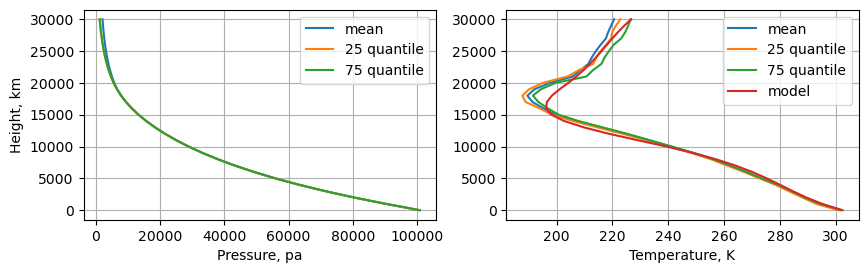

In [20]:
means_and_plots('f_winter','Pressure, pa','Temperature, K')

### spring describe

MSE is  10.328
MAPE is 0.011
MAE is  2.446


interp_PRES_PA                                                     \
                  count           mean         std        min          25%   
km_array                                                                     
0                  24.0  100758.333333  147.196014  100400.00  100675.0000   
1000               24.0   90204.478750  118.571142   89920.13   90159.8100   
2000               24.0   80362.963750   98.952622   80109.64   80302.0875   
3000               24.0   71357.374583   94.405732   71127.84   71311.5225   
4000               24.0   63241.660000  107.455612   63046.15   63152.4975   
5000               24.0   55904.823333   82.137441   55762.07   55842.6550   
6000               24.0   49295.538333   53.839963   49183.82   49249.3775   
7000               24.0   43363.644167   47.247876   43250.00   43336.3500   
8000               24.0   38020.215417   35.118650   37950.00   37992.9050   
9000               24.0   33223.258750   51.194223   33157.69   33187.5900   
10000              24.0   28905.027500   52.113409   28833.33   28872.8700   
11000              24.0   25043.257917   62.013774   24927.27   25000.0000   
12000              24.0   21592.700833   65.688894   21477.57   21556.6375   
13000              24.0   18499.791667   64.894767   18376.47   18460.9575   
14000              24.0   15757.825417   60.308797   15657.35   15716.2500   
15000              24.0   13327.949583   49.786093   13246.45   13288.5975   
16000              24.0   11221.461667   42.494426   11167.74   11195.9300   
17000              24.0    9385.575417   27.994280    9334.08    9366.6525   
18000              24.0    7843.217500   18.503867    7807.38    7834.0425   
19000              24.0    6584.144583   20.800766    6551.14    6571.0950   
20000              23.0    5558.608696   17.452692    5533.45    5547.6850   
21000              23.0    4708.465217   15.529886    4678.67    4699.0100   
22000              23.0    4002.176087   12.209332    3975.41    3995.0000   
23000              23.0    3409.483913    8.422406    3396.04    3404.6850   
24000              23.0    2908.105217    7.853000    2891.40    2903.2850   
25000              23.0    2488.882174    9.020354    2472.47    2483.3050   
26000              23.0    2129.150000    6.790679    2116.82    2124.4600   
27000              23.0    1825.171304    6.742155    1811.28    1821.3800   
28000              23.0    1565.963913    7.545508    1553.85    1561.0500   
29000              23.0    1343.248696    6.504991    1332.15    1338.3100   
30000              23.0    1153.734348    5.545432    1143.99    1149.5650   

                                             interp_TEMP_K              \
                 50%          75%        max         count        mean   
km_array                                                                 
0         100800.000  100900.0000  100900.00          24.0  300.866667   
1000       90234.030   90275.2750   90357.81          24.0  295.350833   
2000       80385.285   80414.1650   80559.78          24.0  289.338333   
3000       71379.690   71422.6400   71472.93          24.0  283.807083   
4000       63240.365   63318.8300   63485.40          24.0  279.051250   
5000       55923.255   55975.5775   56030.08          24.0  273.708750   
6000       49308.260   49313.9475   49369.10          24.0  268.154167   
7000       43369.585   43391.2575   43460.47          24.0  262.607083   
8000       38026.680   38045.1125   38081.36          24.0  256.405417   
9000       33216.725   33254.3700   33348.82          24.0  249.574583   
10000      28890.475   28936.2875   29018.91          24.0  241.919167   
11000      25037.040   25074.4200   25149.18          24.0  233.992083   
12000      21592.535   21648.4325   21704.35          24.0  225.616667   
13000      18488.500   18541.0275   18616.51          24.0  217.179583   
14000      15738.670   15797.9175   15865.79          24.0  208.789167   
15000      13319.305   1

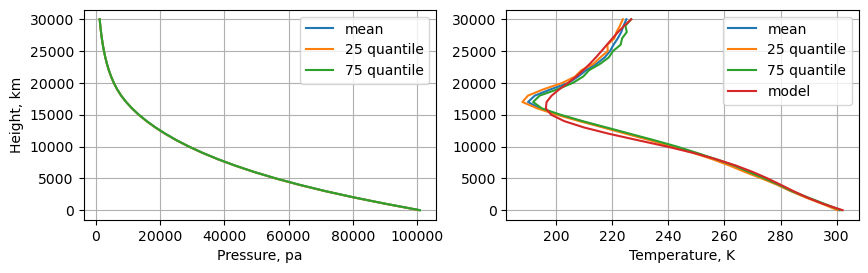

In [21]:
means_and_plots('f_spring','Pressure, pa','Temperature, K')

### summer describe

MSE is  6.797
MAPE is 0.01
MAE is  2.17


interp_PRES_PA                                                    \
                  count           mean         std        min         25%   
km_array                                                                    
0                  27.0  100859.259259  142.124699  100600.00  100750.000   
1000               27.0   90254.110370  127.852261   89993.70   90155.450   
2000               27.0   80358.912222  131.720709   80090.53   80241.655   
3000               27.0   71345.574444   98.337331   71136.43   71271.015   
4000               27.0   63190.810000   99.957522   63025.32   63121.280   
5000               27.0   55823.240370   80.880917   55717.24   55752.030   
6000               27.0   49198.315926   66.303575   49109.09   49155.910   
7000               27.0   43226.259259   52.521797   43154.55   43190.195   
8000               27.0   37867.669630   41.771211   37822.18   37839.695   
9000               27.0   33057.857407   46.348386   32995.48   33025.755   
10000              27.0   28729.862963   47.240046   28661.63   28693.760   
11000              27.0   24846.336667   57.272938   24750.77   24784.205   
12000              27.0   21387.474815   60.249973   21279.86   21338.215   
13000              27.0   18305.562222   64.907441   18193.25   18263.225   
14000              27.0   15578.565926   56.830770   15466.02   15534.155   
15000              27.0   13173.128148   53.437438   13079.85   13136.745   
16000              27.0   11086.554444   42.447193   11027.76   11055.505   
17000              27.0    9316.460000   26.091534    9274.00    9300.630   
18000              27.0    7850.205926   17.745434    7820.55    7839.125   
19000              27.0    6629.170741   16.384980    6608.99    6615.705   
20000              27.0    5615.216296   15.263199    5591.03    5603.515   
21000              27.0    4767.916667   13.092190    4746.15    4758.380   
22000              27.0    4055.300000   10.959450    4039.82    4045.830   
23000              27.0    3458.737778   40.041159    3429.38    3442.535   
24000              27.0    2966.269259  137.216123    2919.05    2931.175   
25000              27.0    2551.279259  219.873983    2489.92    2501.735   
26000              27.0    2198.729630  290.236709    2126.89    2135.410   
27000              27.0    1899.341852  349.980171    1819.46    1825.110   
28000              27.0    1644.900000  400.796232    1557.10    1562.010   
29000              27.0    1428.481111  444.033026    1331.30    1337.945   
30000              27.0    1244.218889  480.847089    1139.30    1146.880   

                                           interp_TEMP_K              \
                50%         75%        max         count        mean   
km_array                                                               
0         100900.00  100950.000  101200.00          27.0  301.120370   
1000       90261.60   90338.805   90537.74          27.0  294.221111   
2000       80377.85   80448.015   80580.51          27.0  288.620741   
3000       71346.91   71431.700   71560.22          27.0  283.344074   
4000       63193.41   63272.880   63397.78          27.0  277.955185   
5000       55810.75   55875.450   56009.30          27.0  272.238148   
6000       49179.81   49238.585   49360.26          27.0  266.338519   
7000       43205.90   43255.390   43355.25          27.0  260.871481   
8000       37858.42   37883.750   38019.96          27.0  254.686296   
9000       33038.86   33093.120   33158.03          27.0  247.232963   
10000      28715.47   28758.740   28833.33          27.0  239.486296   
11000      24853.21   24890.640   24963.80          27.0  231.607778   
12000      21384.27   21430.450   21503.23          27.0  223.400000   
13000      18307.85   18344.125   18410.61          27.0  215.331111   
14000      15579.83   15619.890   15692.24          27.0  207.765185   
15000      13167.87   13211.275   13270.09          27.0  200.810370   
16000      11067.31   

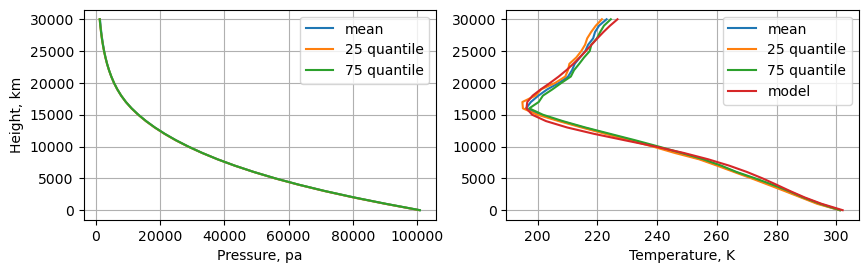

In [22]:
means_and_plots('f_summer','Pressure, pa','Temperature, K')

###  fall describe

MSE is  4.025
MAPE is 0.007
MAE is  1.616


interp_PRES_PA                                                     \
                  count           mean         std        min          25%   
km_array                                                                     
0                  29.0  100841.379310  115.006961  100600.00  100800.0000   
1000               29.0   90246.996207   90.381956   90046.77   90203.4500   
2000               29.0   80375.511724  103.707750   80189.38   80300.0000   
3000               29.0   71324.431379   70.727106   71180.72   71285.7100   
4000               29.0   63162.075862   62.839499   63024.86   63130.7700   
5000               29.0   55804.420345   56.468326   55719.11   55771.5800   
6000               29.0   49182.350000   42.418253   49120.42   49169.8400   
7000               29.0   43228.192759   42.520146   43151.43   43204.1200   
8000               29.0   37880.622069   40.462967   37823.73   37860.7400   
9000               29.0   33084.361034   48.015142   32985.01   33049.7200   
10000              29.0   28771.251379   42.573375   28718.20   28740.7400   
11000              29.0   24884.451379   45.963735   24816.75   24854.0100   
12000              29.0   21425.422069   49.714605   21340.17   21384.9900   
13000              29.0   18327.620000   51.547474   18251.57   18291.2600   
14000              29.0   15581.118966   54.147183   15485.71   15554.6200   
15000              29.0   13156.463793   45.936625   13056.18   13133.9000   
16000              29.0   11056.693793   29.121423   10994.94   11035.6100   
17000              29.0    9277.127241   18.390165    9248.99    9267.3000   
18000              28.0    7791.557857   14.627246    7766.23    7780.7450   
19000              28.0    6561.351786   12.324108    6540.61    6552.1575   
20000              28.0    5541.251071    8.622856    5525.23    5535.4825   
21000              28.0    4690.307143    8.480269    4673.07    4685.5525   
22000              28.0    3978.867143    9.830424    3955.33    3972.5725   
23000              28.0    3381.026786    7.256151    3366.48    3374.6925   
24000              28.0    2877.060357    7.165864    2858.72    2872.8900   
25000              28.0    2452.802500    7.001938    2428.97    2450.0150   
26000              28.0    2093.828571    7.849927    2071.26    2089.7175   
27000              28.0    1790.745357    7.581864    1771.98    1788.2750   
28000              28.0    1534.392500    8.177949    1518.01    1531.3400   
29000              28.0    1317.166786    8.667803    1298.15    1313.4050   
30000              28.0    1132.406429    7.934602    1115.25    1128.6225   

                                             interp_TEMP_K              \
                 50%          75%        max         count        mean   
km_array                                                                 
0         100800.000  100900.0000  101100.00          29.0  300.232759   
1000       90235.840   90307.5700   90424.66          29.0  294.365862   
2000       80378.430   80439.7000   80698.60          29.0  288.408966   
3000       71305.920   71367.0600   71546.67          29.0  282.713448   
4000       63161.770   63208.2800   63276.39          29.0  277.267586   
5000       55805.590   55820.9300   55954.71          29.0  272.165862   
6000       49177.710   49184.1400   49306.31          29.0  266.806207   
7000       43221.150   43242.7500   43345.42          29.0  261.597241   
8000       37879.540   37885.3500   37984.13          29.0  255.348276   
9000       33071.300   33119.2500   33164.57          29.0  248.038276   
10000      28756.000   28796.2700   28863.77          29.0  240.077241   
11000      24857.870   24925.9300   24964.36          29.0  231.797241   
12000      21413.220   21465.5600   21505.48          29.0  223.230000   
13000      18316.460   18370.7200   18427.94          29.0  214.568966   
14000      15577.260   15608.7000   15707.35          29.0  206.114828   
15000      13145.980   1

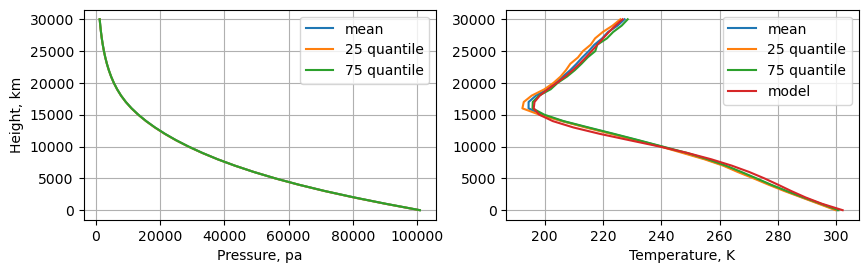

In [23]:
means_and_plots('f_fall','Pressure, pa','Temperature, K')

# Wind

### winter describe

interp_DRCT                                                     \
               count        mean         std     min       25%      50%   
km_array                                                                  
0               30.0   90.166667   84.532011   15.00   50.0000   57.500   
1000            30.0  122.019000  133.652895    0.78   19.8200   33.275   
2000            30.0  188.112667  134.813747    5.54   34.7225  264.970   
3000            30.0  230.587000  111.871090   12.73  148.1775  278.080   
4000            30.0  224.644667  113.186229    6.55  138.6575  264.930   
5000            30.0  222.998333  114.008617   10.42  127.7550  275.935   
6000            30.0  208.431000  106.551943   24.57  115.0625  234.785   
7000            30.0  154.433000  106.119488    1.14   65.8900  131.075   
8000            30.0  139.604667   92.926140    3.78   57.5050  130.540   
9000            30.0  134.862000   87.685546   14.78   53.2400  119.105   
10000           30.0  149.582000   76.764771   51.54  102.8325  123.720   
11000           30.0  135.625000   57.032697   35.00  105.2225  122.500   
12000           30.0  128.279333   41.526651   44.14  106.0275  123.760   
13000           30.0  124.082667   27.189759   85.19  106.2775  119.060   
14000           30.0  125.462333   47.634803   60.00  108.4625  115.570   
15000           30.0  114.064000   53.979202   10.44   94.2875  108.360   
16000           30.0  129.283333   72.491774   58.47   92.4375  101.985   
17000           29.0  154.325172   85.033681   39.96   80.7100  129.740   
18000           29.0  155.056897   85.317558   20.40   98.4300  118.170   
19000           28.0  111.315357   76.128820   36.17   70.9925   88.625   
20000           26.0   87.263462   19.260346   17.55   77.4375   88.820   
21000           26.0  131.214231   86.314623    7.56   91.5650  105.285   
22000           26.0  251.789615   76.772420    4.21  253.8000  274.745   
23000           25.0  267.264000   17.424463  227.59  251.9200  269.920   
24000           25.0  267.904400   18.157901  210.62  259.4700  270.520   
25000           25.0  270.369600   22.718670  173.11  264.2700  273.860   
26000           25.0  268.351600   32.075232  135.93  256.0100  275.000   
27000           25.0  273.266400   16.261358  239.23  264.2600  272.230   
28000           25.0  265.660400   44.563746   68.24  265.0000  276.900   
29000           25.0  261.688800   39.036433   83.32  259.2900  269.320   
30000           25.0  266.691600   21.995152  192.10  258.8400  268.480   

                           interp_SKNT                                       \
               75%     max       count       mean        std   min      25%   
km_array                                                                      
0          63.7500  290.00        30.0   2.812333   0.841762  1.54   2.0600   
1000      261.4750  356.92        30.0   9.703333   2.609325  2.94   7.8925   
2000      311.9575  343.13        30.0   6.641000   3.633511  1.03   5.0050   
3000      317.1325  350.00        30.0   6.635667   3.311641  1.92   4.8500   
4000      302.9200  348.24        30.0   6.381333   3.031220  0.32   4.9225   
5000      301.4100  341.33        30.0   5.515000   3.545750  0.47   3.0725   
6000      300.9400  350.00        30.0   4.995000   3.183537  1.30   2.8625   
7000      252.4725  348.76        30.0   5.415000   2.548507  1.02   3.6525   
8000      217.2950  305.35        30.0   5.819000   2.325621  0.04   4.6700   
9000      207.3675  333.68        30.0   6.566667   2.686198  0.94   4.7550   
10000     179.9425  347.91        30.0   6.948333   3.469625  1.99   4.5975   
11000     143.6325  319.27        30.0   8.969000   3.405114  1.03   6.7000   
12000     145.2525  275.42        30.0  10.400667   3.851002  5.23   7.3475   
13000     134.5275  192.14        30.0  12.713667   5.894925  4.17   8.2625   
14000     125.5250  247.28        30.0  16.938333   7.526348  5.63  12.0025   
15000     118.1350  268.28        30

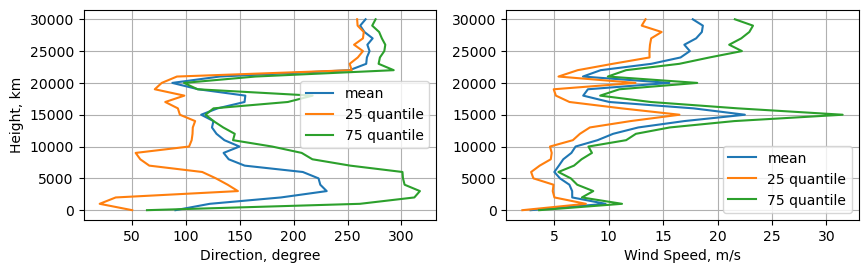

In [24]:
means_and_plots('sec_winter', 'Direction, degree', 'Wind Speed, m/s')

### spring describe

interp_DRCT                                                     \
               count        mean         std     min       25%      50%   
km_array                                                                  
0               24.0  140.625000  131.697219    0.00   27.5000   77.500   
1000            24.0  189.993750  121.794040    4.31   79.6325  188.835   
2000            24.0  209.415417   95.012480    6.26  142.6400  240.590   
3000            24.0  204.575833   90.529593   64.63  129.7700  212.090   
4000            24.0  161.317083  101.785154    2.30   71.4850  127.915   
5000            24.0  141.391667   88.371790   17.85   87.4025  100.830   
6000            24.0  147.119167   91.826112   39.58   84.3875  113.630   
7000            24.0  121.660417   80.323533   12.28   83.2525   95.740   
8000            24.0  118.863750   67.925229   72.56   80.4800   91.140   
9000            24.0  126.306667   67.051080   19.15   94.7275  104.320   
10000           24.0  121.956667   67.643202   22.67   90.3875  109.480   
11000           24.0  131.032917   56.282963   35.49   99.8675  122.740   
12000           24.0  131.232083   52.623965   58.94   98.6375  115.025   
13000           24.0  127.259167   47.662522   71.72   95.9225  114.975   
14000           24.0  123.627917   76.947178   19.99   66.2375  109.290   
15000           24.0  130.329167   90.800723   39.06   57.5050   88.320   
16000           24.0   86.924583   70.728586    6.62   35.9900   70.310   
17000           24.0  104.245833   85.239537   33.28   59.3425   75.275   
18000           24.0  105.867083   60.017648   29.73   66.6975   90.875   
19000           24.0  164.432500   90.280400   10.00   84.9675  171.620   
20000           23.0  251.616522   41.612145  129.02  240.9200  250.810   
21000           23.0  267.781304   30.523647  180.00  258.7350  270.790   
22000           23.0  263.289565   54.292647   32.08  258.8600  274.180   
23000           23.0  272.032174   18.663205  237.05  259.9450  272.360   
24000           23.0  268.285217   18.740101  227.21  258.4400  272.060   
25000           23.0  272.570870   19.696855  217.58  260.3000  277.010   
26000           23.0  273.565652   17.944917  228.98  265.6500  272.300   
27000           23.0  271.497391   31.579897  193.70  261.0200  270.800   
28000           23.0  275.143913   33.890809  186.91  254.2700  279.230   
29000           23.0  263.146522   48.018143  124.04  245.7950  258.790   
30000           23.0  218.647391   91.234508    8.80  187.7150  242.510   

                           interp_SKNT                                      \
               75%     max       count       mean       std   min      25%   
km_array                                                                     
0         260.0000  350.00        24.0   1.306667  0.370436  0.51   1.0300   
1000      311.8500  348.61        24.0   3.886250  2.054833  1.19   2.6975   
2000      282.6850  350.95        24.0   4.666667  3.070364  0.51   2.6100   
3000      282.1125  350.00        24.0   3.948750  1.836870  0.42   2.3750   
4000      264.0400  309.37        24.0   5.300833  2.011069  0.26   4.4700   
5000      258.1675  297.44        24.0   5.802083  3.022472  0.51   4.9950   
6000      253.4775  320.89        24.0   5.925000  2.729005  0.24   4.6450   
7000      120.7650  305.57        24.0   6.160000  2.396933  1.03   4.8425   
8000      125.2325  309.77        24.0   6.422083  2.408463  2.33   4.2575   
9000      125.4525  330.33        24.0   6.204583  3.154435  1.12   4.6250   
10000     126.9925  302.60        24.0   7.085000  3.538233  1.52   4.1950   
11000     140.8450  308.52        24.0   8.307083  4.194301  0.51   5.3000   
12000     146.3275  255.72        24.0   8.856667  4.789588  1.13   5.1400   
13000     141.3775  245.09        24.0   8.913750  4.248058  1.87   6.0350   
14000     164.9975  334.84        24.0   8.161250  3.511996  2.28   5.1400   
15000     201.0250  344.22        24.0   7.881667  4.4

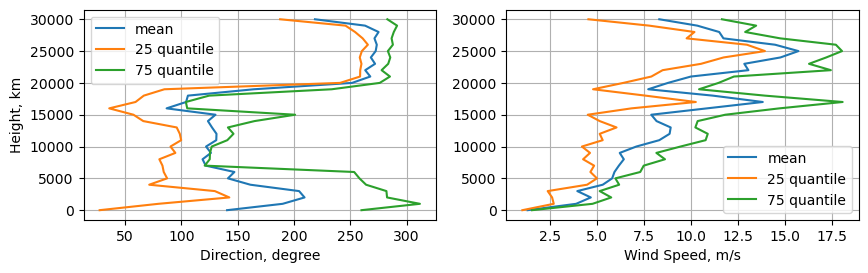

In [25]:
means_and_plots('sec_spring', 'Direction, degree', 'Wind Speed, m/s')

### summer describe

interp_DRCT                                                    \
               count        mean        std     min       25%      50%   
km_array                                                                 
0               27.0  239.629630  30.631995  145.00  232.5000  240.000   
1000            27.0  173.399259  23.484119  128.00  160.1000  179.900   
2000            27.0  184.292222  95.693397    0.00  121.1050  220.050   
3000            27.0  178.758148  99.068041    0.00   84.8200  184.900   
4000            27.0  141.500741  92.646501    5.93   75.1950  132.450   
5000            27.0  145.615556  88.886840   13.52   88.1050  125.000   
6000            27.0  131.247778  74.747363   19.23   81.3450  120.310   
7000            27.0   88.407778  38.456586   17.68   70.8200   95.000   
8000            27.0   96.904815  35.353847   30.79   77.4950   92.230   
9000            27.0   90.431111  39.728620   24.28   58.3800   86.400   
10000           27.0   86.309630  47.124859    9.13   65.3600   74.700   
11000           27.0   89.357037  73.042804    8.91   59.5350   69.210   
12000           27.0   85.561481  65.297229    8.01   56.5450   66.470   
13000           27.0   70.304074  28.869478   12.02   51.1900   65.180   
14000           27.0   75.532963  24.730770   36.78   56.6850   71.690   
15000           27.0   80.040370  24.469984   25.38   65.0650   78.340   
16000           27.0   83.931111  36.895456   25.58   62.6300   75.730   
17000           27.0  140.265556  85.963772    8.44   78.8550  104.250   
18000           27.0  211.662593  91.369626   16.37  150.6000  242.950   
19000           27.0  227.784444  82.893155    4.06  199.9050  256.030   
20000           27.0  251.308519  62.107580   19.04  245.1350  265.000   
21000           27.0  259.893704  55.059112    8.03  249.2050  267.970   
22000           27.0  265.225926  40.498883  143.79  253.3300  275.190   
23000           26.0  265.937308  57.281367    7.17  260.2625  274.110   
24000           26.0  262.806154  60.121139   47.45  263.9175  277.320   
25000           26.0  264.370769  56.492868   37.56  243.1175  275.290   
26000           26.0  246.855000  67.200759   66.17  227.5300  261.970   
27000           26.0  143.300385  80.970755   19.54   84.9150  154.315   
28000           26.0   88.705000  26.906983   27.59   74.3350   88.745   
29000           26.0   91.251154   9.408940   74.84   84.2775   90.185   
30000           26.0   91.920769   8.297033   76.13   86.5575   93.440   

                           interp_SKNT                                        \
               75%     max       count       mean        std    min      25%   
km_array                                                                       
0         250.0000  305.00        27.0   2.116296   0.626714   1.54   2.0600   
1000      188.3750  207.37        27.0   7.084074   1.750084   3.17   6.1500   
2000      264.8850  324.33        27.0   4.087407   2.339722   0.02   2.3650   
3000      268.1850  320.37        27.0   4.939630   2.502762   0.76   2.8850   
4000      178.7600  357.92        27.0   5.977407   3.173542   0.00   3.7450   
5000      191.8900  337.36        27.0   6.701481   3.235618   0.55   5.1400   
6000      160.7150  330.39        27.0   6.097037   3.862787   0.58   4.1250   
7000      105.3300  196.36        27.0   7.821852   4.193467   0.45   5.0450   
8000      119.0700  181.42        27.0   8.087037   3.222029   1.09   5.9250   
9000      123.1750  154.88        27.0   8.662963   3.066653   3.16   6.5900   
10000     103.5250  245.55        27.0  10.762963   5.388246   0.19   7.3600   
11000      80.9200  357.04        27.0  12.890000   5.825407   1.40   8.3250   
12000      99.5300  349.30        27.0  16.030370   7.845757   4.18   9.6900   
13000      85.2200  140.38        27.0  18.130741  10.295364   2.85   8.5100   
14000      91.0750  144.79        27.0  16.954444   7.789737   4.15  11.4900   
15000      90.5300  126.85        27.0  16.102963  1

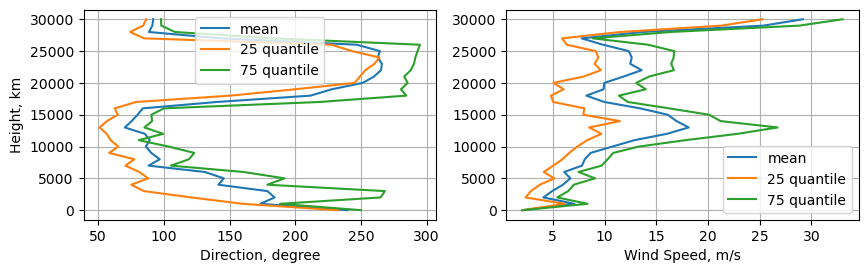

In [26]:
means_and_plots('sec_summer', 'Direction, degree', 'Wind Speed, m/s')

###  fall describe

interp_DRCT                                                    \
               count        mean         std    min       25%      50%   
km_array                                                                 
0               29.0  197.241379  156.510989   0.00   20.0000  290.000   
1000            29.0  139.715172   58.154004   1.23  108.9100  139.020   
2000            29.0  130.685517   51.650422   7.99  106.5700  126.270   
3000            29.0  115.606207   57.835503  34.39   85.8600  108.250   
4000            29.0   91.416207   56.912052   0.98   73.2600   83.660   
5000            29.0   91.788966   50.247000  26.95   67.4700   89.940   
6000            29.0   81.251034   29.260577   0.00   71.9200   77.050   
7000            29.0   87.443793   36.146708  30.44   67.8700   85.290   
8000            29.0  101.835517   41.573607  24.12   82.2700   93.490   
9000            29.0  101.241379   33.179094  40.89   82.8100   96.520   
10000           29.0   86.333103   29.147873  16.64   76.3200   88.100   
11000           29.0   75.013793   19.310707  24.39   65.0000   79.890   
12000           29.0   67.681724   23.651879   5.67   62.3500   70.000   
13000           29.0   67.851724   21.134149  16.36   54.6300   69.470   
14000           29.0   71.226207   23.654578  30.00   57.8700   72.560   
15000           29.0   86.695172   45.046490  30.00   67.4700   81.220   
16000           29.0  125.002759   83.081824  55.23   75.0000   87.590   
17000           29.0  205.937586   98.631283  11.76  122.5300  241.580   
18000           28.0  232.635714   81.477212  45.44  162.7175  253.575   
19000           28.0  238.864643   76.710246  34.10  201.9050  273.190   
20000           28.0  190.161429   97.747114  23.94   90.7975  224.910   
21000           28.0  227.925714   81.088167  39.15  175.4800  240.155   
22000           28.0  243.646071   67.371711  61.22  228.4575  256.960   
23000           28.0  242.557143   61.907398  31.80  229.4850  257.160   
24000           28.0  257.870714   73.315062  44.07  217.0275  279.055   
25000           28.0  227.408214   90.352486  29.06  167.3650  252.630   
26000           28.0  112.888571   72.641545   5.91   74.7325   91.110   
27000           28.0   90.430714   27.596894  43.74   70.4175   88.300   
28000           28.0   94.519286   16.509342  64.03   83.0300   91.645   
29000           28.0   88.971429   11.308947  72.40   80.0875   86.355   
30000           28.0   88.891429    8.515147  76.41   82.7825   87.305   

                           interp_SKNT                                       \
               75%     max       count       mean       std    min      25%   
km_array                                                                      
0         340.0000  355.00        29.0   1.861379  0.465761   0.51   1.5400   
1000      170.3100  259.76        29.0   3.968966  2.254423   0.05   2.2100   
2000      170.0700  240.22        29.0   4.464828  2.208718   1.03   2.7900   
3000      141.2400  335.32        29.0   5.131724  2.134208   1.69   4.1000   
4000      105.8500  350.00        29.0   6.981034  2.563444   0.00   5.1900   
5000       98.6000  329.52        29.0   7.484828  2.507938   1.96   5.6600   
6000       98.2600  138.14        29.0   7.651034  2.851660   2.25   6.4400   
7000       98.5300  172.06        29.0   7.397931  3.437217   0.51   5.2800   
8000      112.9700  240.00        29.0   6.911724  2.103711   2.84   5.2800   
9000      118.3000  190.06        29.0   7.225862  2.726046   0.64   5.1400   
10000      97.7800  166.88        29.0   7.914828  2.895162   1.63   6.1500   
11000      89.2600  109.63        29.0   9.668966  3.727094   2.64   8.0200   
12000      80.0700  112.54        29.0  11.162759  3.435546   5.47   8.3900   
13000      79.2200  100.00        29.0  13.388276  4.718863   6.17   9.5400   
14000      83.8000  139.74        29.0  15.894483  6.070383   7.39  11.8400   
15000      90.7700  288.61        29.0  16.936897  8.619301   5.27  11

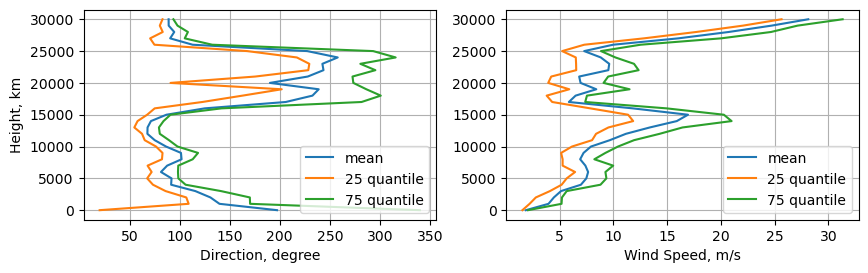

In [27]:
means_and_plots('sec_fall', 'Direction, degree', 'Wind Speed, m/s')

In [38]:
utc_00 = pd.read_csv('iri\\30_01.csv')
utc_12 = pd.read_csv('iri\\30_01_2.csv')

Text(0.5, 1.0, 'Высостный профиль концентрации электронов для Сингапура\nПри f10.7 = 71.4; ap = 14.4')

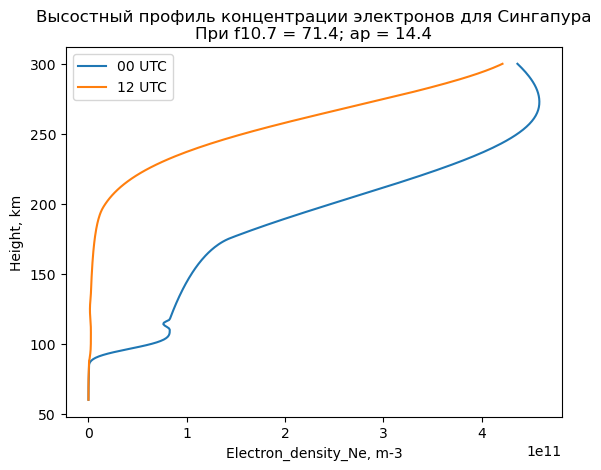

In [56]:
plt.plot(utc_00[' Electron_density'],utc_00['     Height km'])
plt.plot(utc_12[' Electron_density'],utc_00['     Height km'])
plt.legend(['00 UTC', '12 UTC'])
plt.xlabel('Electron_density_Ne, m-3')
plt.ylabel('Height, km')
plt.title('Высостный профиль концентрации электронов для Сингапура\n' \
'При f10.7 = 71.4; ap = 14.4' )

Text(0.5, 1.0, 'Высостный профиль концентрации электронов для Сингапура\nПри f10.7 = 71.4; ap = 14.4')

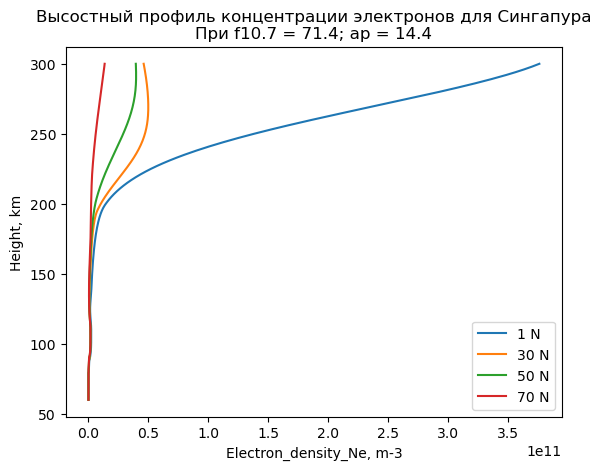

In [57]:
utc_0 = pd.read_csv('iri\\19_01_1.csv')
utc_1 = pd.read_csv('iri\\19_01_2.csv')
utc_2 = pd.read_csv('iri\\19_01_3.csv')
utc_3 = pd.read_csv('iri\\19_01_4.csv')

plt.plot(utc_0[' Electron_density'],utc_00['     Height km'])
plt.plot(utc_1[' Electron_density'],utc_00['     Height km'])
plt.plot(utc_2[' Electron_density'],utc_00['     Height km'])
plt.plot(utc_3[' Electron_density'],utc_00['     Height km'])

plt.legend(['1 N', '30 N', '50 N', '70 N'])
plt.xlabel('Electron_density_Ne, m-3')
plt.ylabel('Height, km')
plt.title('Высостный профиль концентрации электронов для Сингапура\n' \
'При f10.7 = 71.4; ap = 14.4' )

In [ ]:
19	68.9	69.3	1.9